<center><h1>QBUS6850 - Tutorial 5 - Scalable Classification Methods</h1></center>

<center><h1>Semester 2, 2019</h1></center>

**Objectives**
- Get familiar with kNN and K-means algorithm
- Apply kNN and K-means algorithm by using scikit-learn library  

**Tasks**
- kNN Classification
- kNN Classification - Practical Example and Optimising k
- K-means Clustering  


**Review: Lecture 4**


**Review: tutorial 4**
1. Ridge Regression  
    `from sklearn.linear_model import RidgeCV`    
    `ridge.alpha_`    
    
    `from sklearn.model_selection import train_test_split`  
    `X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.2, random_state = 0)`

<br>  
2. Text Feature Extraction  
    - BoW  
    `from sklearn.feature_extraction.text import CountVectorizer`    
    `vectorizer = CountVectorizer(ngram_range, min_df)`    
    `vectorizer.fit_transform(corpus)`    
    `vectorizer.get_feature_names()`    
    `vectorizer.transform(['something']).toarray()`    
    
    - tf-idf  
    `from sklearn.feature_extraction.text import TfidfTransformer`    
    `transformer = TfidfTransformer(smooth_idf = False)`  
    `transformer.fit_transform(counts)`
    
    `from sklearn.feature_extraction.text import TfidfVectorizer`   
    `vectorizer = TfidfVectorizer()`   
    `vectorizer.fit_transform(corpus)`   

<br>  
3. Feature Selection  
    `from sklearn.linear_model import LassoCV, ElasticNetCV`  

<br>  
4. Classification  
    - Logistic Regression  
    `from sklearn.linear_model import LogisticRegression`  
    `log_res = LogisticRegression()`  
    `log_res.fit(X_train, t_train)`  
    `log_res.predict(X_val)`  
    `log_res.predict_proba(X_val)`  
    
    - Confusion matrix  
    `from sklearn.metrics import confusion_matrix`  
    `print(confusion_matrix(t_val, t_pred))`  
    - classification report  
    `from sklearn.metrics import classification_report`   
    `print(classification_report(t_val, t_pred, digits=3))`  

## kNN Classification

k Nearest Neighbors is a very simple, yet highly effective and scalable
classifcation method. It is supervised in the sense that we build a decision
mesh based on observed training data. It is non-parametric, meaning
it makes no assumptions about the structure or form of the generative function.
It is also instance-based which means that it doesn't explicitiy learn
a model. Instead it simply uses the training data as "knowledge" about the
domain. Practically this means that the training data is only used when a
specific query is made ("which data points am I closest to?").

This highly flexible and "just in time" nature means that it scales well to
hugre volumes of data and is often the first port of call for classifying
massive data sets.

Since kNN is non-parametric it is generally considered to have high variance
and low bias. However we can tune this by increasing k - the number of neighbours
to average over. A higher value for k leads to a smoother decision mesh/boundary
and lower variance. For each application you must tune k on your training data
for optimal performance.

__Step1:__ kNN can perform poorly if your features are not all at the same scale.
Therefore it is good to <span class="girk">normalise</span> them to be within the same range, otherwise
features with larger or smaller scales can dominate.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
# to generate special colormaps for ordinary mapping
from matplotlib.colors import ListedColormap 

from sklearn import neighbors
# Generate isotropic Gaussian blobs
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(100,
                  centers= [[2, 2], [1, -2]],
                  cluster_std=[1.5, 1.5],
                  random_state = 1)

__Step2:__ We will <span class="girk">generate a set of x,y locations</span>. These will then be fed into the `predict()` function of our KNN classifiers. Then we can plot the result of each (x, y) position to show the boundary of the classifiers.

In [3]:
"""
Initialise some plotting variables
"""
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each point 
# in the mesh [x_min, m_max] x [y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

__Step3:__ Do KNN Classification for <span class="mark">k = 1</span>

In [4]:
n_neighbor_1 = 1

knn_clf_1 = neighbors.KNeighborsClassifier(n_neighbor_1,  # the number of neighbours
                                           weights='uniform' # weight function used in prediction
                                          )
knn_clf_1.fit(X, y)

Z_1 = knn_clf_1.predict(np.c_[xx.ravel(), yy.ravel()])  
# np.ravel() return a contiguous flattened array
# np.c_ is a way to combine 1D arrays into 2D array: 
# here from (291014,)+(291014,) to (291014, 2)

# Put the result into a color 
Z_1 = Z_1.reshape(xx.shape)

# reshape from (291014,) to (641, 454)

__Step4:__ Do KNN Classification for <span class="mark">k = 50</span>

In [5]:
n_neighbor_2 = 50

knn_clf_50 = neighbors.KNeighborsClassifier(n_neighbor_2, weights='uniform')
knn_clf_50.fit(X, y)

Z_50 = knn_clf_50.predict(np.c_[xx.ravel(), yy.ravel()])  

Z_50 = Z_50.reshape(xx.shape)

__Step5:__ Plot the decision boundary and the classification of indivudal data points

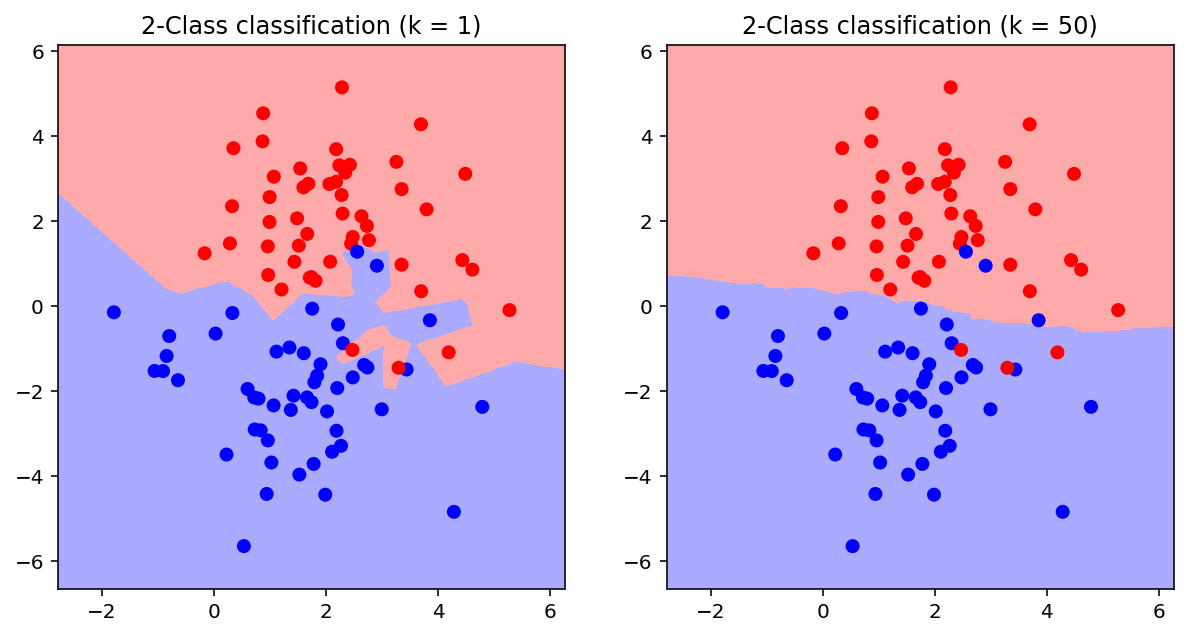

In [6]:
fig5 = plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1) # (nrows, ncols, index)
plt.gcf().set_size_inches(10, 5)
plt.pcolormesh(xx, yy, Z_1, cmap = cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = {})".format(n_neighbor_1))

plt.subplot(1, 2, 2)
plt.gcf().set_size_inches(10, 5)
plt.pcolormesh(xx, yy, Z_50, cmap = cmap_light)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = {})".format(n_neighbor_2));


### Observations

Note that with <span class="mark">small k we have high variance/low bias</span> (model fits closely to training data) and with <span class="girk">larger k we have low variance/high bias</span> (model fits more closely to generative data process).

In other words it is likely that a small k value will lead to overfitting, while larger k can lead to underfitting.

## kNN Classification - Practical Example and Optimising k

We can use kNN Classification for all sorts of data. Here we will use kNN to classify
images of hand written English characters.

In this dataset there are 1797 character image. Each image is 8x8 pixels i.e.
of dimension 64. We reshape each image to a 64x1 vector. Therefore we are
"searching" in 64 dimensional space.

**We will use cross validation on the training set to determine performance of a range of k values and then perform final evaluation on the test set.**

The dataset is built into scikit. However you will need to download it from the web as it is too large to be bundled directly.

__Step1:__ Load the dataset by using load_digits() function

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

digits = datasets.load_digits()

__Step2:__ Let's take a look at some sample images. The images in this dataset come from postal codes so they are all numeric.

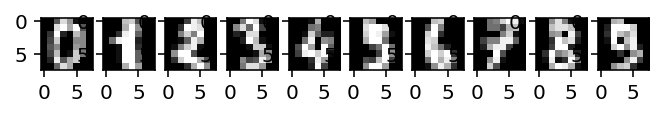

In [8]:
fig6 = plt.figure()

plt.gray()
for i in range(1, 11):
    plt.subplot(1, 11, i)
    plt.imshow(digits.images[i - 1])

__Step3:__ Split the data into train, validation and test sets

In [9]:
trainData, testData, trainLabels, testLabels = train_test_split(np.array(digits.data), 
                                                                digits.target, 
                                                                test_size = 0.25, 
                                                                random_state = 42)

print("Training Points: {}".format(len(trainLabels)))
print("Test points: {}".format(len(testLabels)))

Training Points: 1347
Test points: 450


### Optimising k

__Step4:__ To determine the optimal k we will train our classifier on the training data with various vlaues of k. We will then evaluate the performance of each model on the validation set.

In [20]:
# Store 10-fold CV score for each k
cv_scores = []
k_vals = []

for k in range(1, 30, 2):
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, 
                             trainData, 
                             trainLabels, 
                             cv = 10, 
                             scoring = 'accuracy')
    score = scores.mean()
    print("k = {0}, cv_score = {1:.2f}".format(k, score * 100))
    cv_scores.append(score)
    k_vals.append(k)

    
# Find best performing k
idx = np.argmax(cv_scores)
print()
print("k={0} achieved highest accuracy of {1:.2f}".format(k_vals[idx], cv_scores[idx] * 100))
# Question: 
# 1. a higher CV score is better, or a lower score?
# 2. why step = 2?

k = 1, cv_score = 98.74
k = 3, cv_score = 98.37
k = 5, cv_score = 98.44
k = 7, cv_score = 97.99
k = 9, cv_score = 97.85
k = 11, cv_score = 97.63
k = 13, cv_score = 97.26
k = 15, cv_score = 97.27
k = 17, cv_score = 96.89
k = 19, cv_score = 96.30
k = 21, cv_score = 96.01
k = 23, cv_score = 95.79
k = 25, cv_score = 95.71
k = 27, cv_score = 95.57
k = 29, cv_score = 95.57

k=1 achieved highest accuracy of 98.74


__Step 5__:  We now know that the best k for this set of training and validation data is $k = 1$. We may find a different result if we reshuffle the data or obtain new data. Finally we can build our optimal classifier and evaluate on the test set

In [11]:
model = neighbors.KNeighborsClassifier(n_neighbors = k_vals[idx])

model.fit(trainData, trainLabels)

predictions = model.predict(testData)
 
# Final classification report
print(classification_report(testLabels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [12]:
print(confusion_matrix(testLabels, predictions))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  1  0  0  0  0  0  0 36  1]
 [ 0  0  0  1  1  1  0  0  0 45]]


### Observations

Suprisingly our kNN classifier achieves near perfect classification accuracy on this data set.

**Remember:** more complex models do not guarantee better results. Sometimes it is better to stick with simple and effective methods. 

Note that this is a <span class="mark">multi-class problem</span>. The details of multi-class classification and its confusion matrix will be explained in later lecture.

## K-means Clustering

K-means is a very simple clustering method. It performs suprisingly well in
practice and its simplicity means that it can be applied to massive datasets
with ease.

K-means follows this basic outline:
1. Initialise centroids of clusters
2. Assign labels of data according to centroids
3. Produce new centroids from current clusters
4. Repeat 2-3 until convergence (no change in cluster assignments)

### Weaknesses

K-means is <span class="mark">unsupervised and non-parametric</span>. It does not explicity prescribe
a model. However its avergaing method performs best under <span class="burk">certain conditions,
such as Gaussian distributed clusters</span>. It is also affected greatly by choice
of <span class="burk">initial cluster centroids</span>.

We will illustrate the following weaknesses of k-means:

- Sensitivity to <span class="girk">number of clusters</span>. You must know before hand the true number of clusters in your data, otherwise it will perform poorly
- <span class="girk">Assumption of Gaussian distributed</span> data. If data is anisotropically distributed (stretched) then k-means often fails.
- Clusters should have equal variance
- Clusters should have equal size in space

__Step1:__ Lets generate some synthetic data with three clusters

In [13]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples = n_samples, random_state = random_state) # default = 3 centers

### Incorrect number of clusters

__Step2:__ If we incorrectly guess the number of clusters K-means will produce a defective result

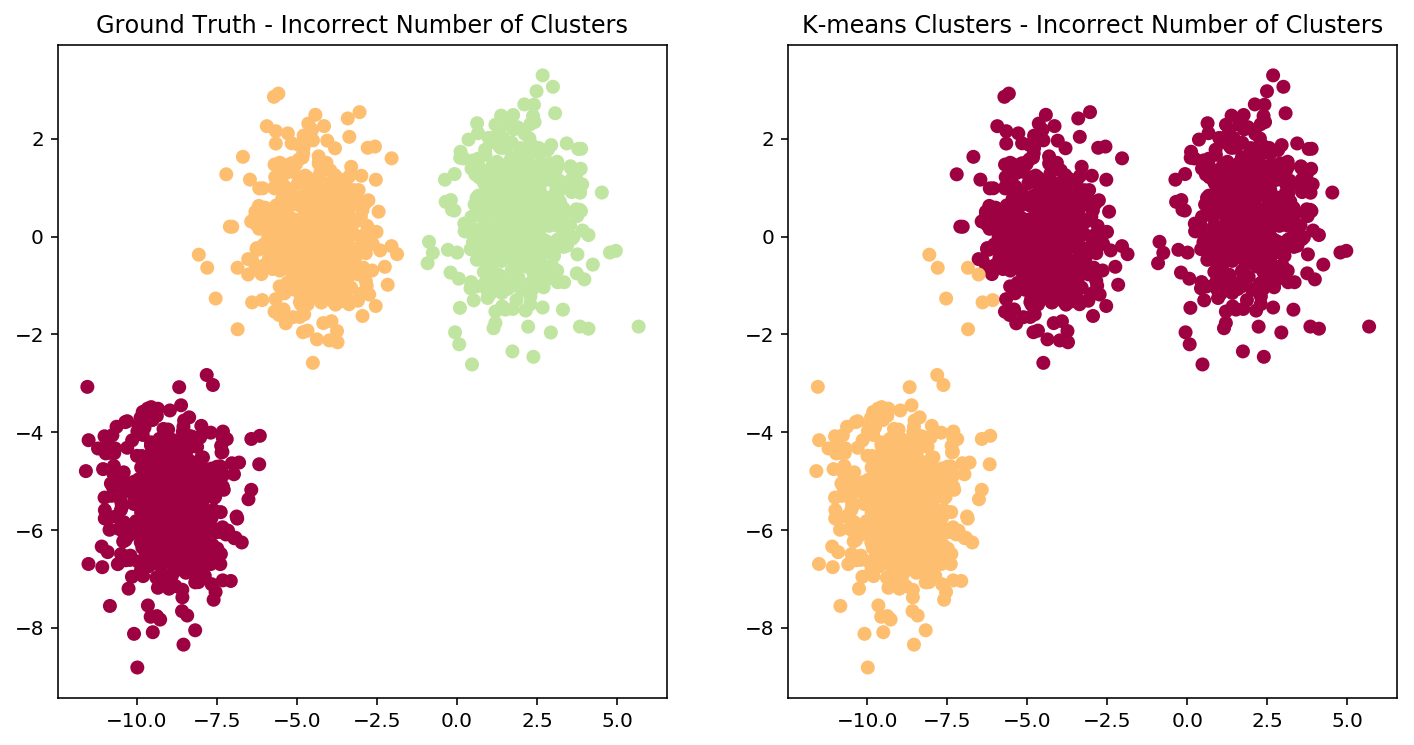

In [16]:
y_pred = KMeans(n_clusters = 2, random_state = random_state).fit_predict(X)

fig1 = plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1],
            c=[cm.Spectral(float(i)/3) for i in y]) # update the pdf file to prevent error messages
plt.title("Ground Truth - Incorrect Number of Clusters")

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1],
            c=[cm.Spectral(float(i)/3) for i in y_pred])
plt.title("K-means Clusters - Incorrect Number of Clusters");


### Anisotropicly distributed data


__Step3:__ If data is anisotrpoically distributed (stretched) instead of Gaussian distributed then k-means often fails.

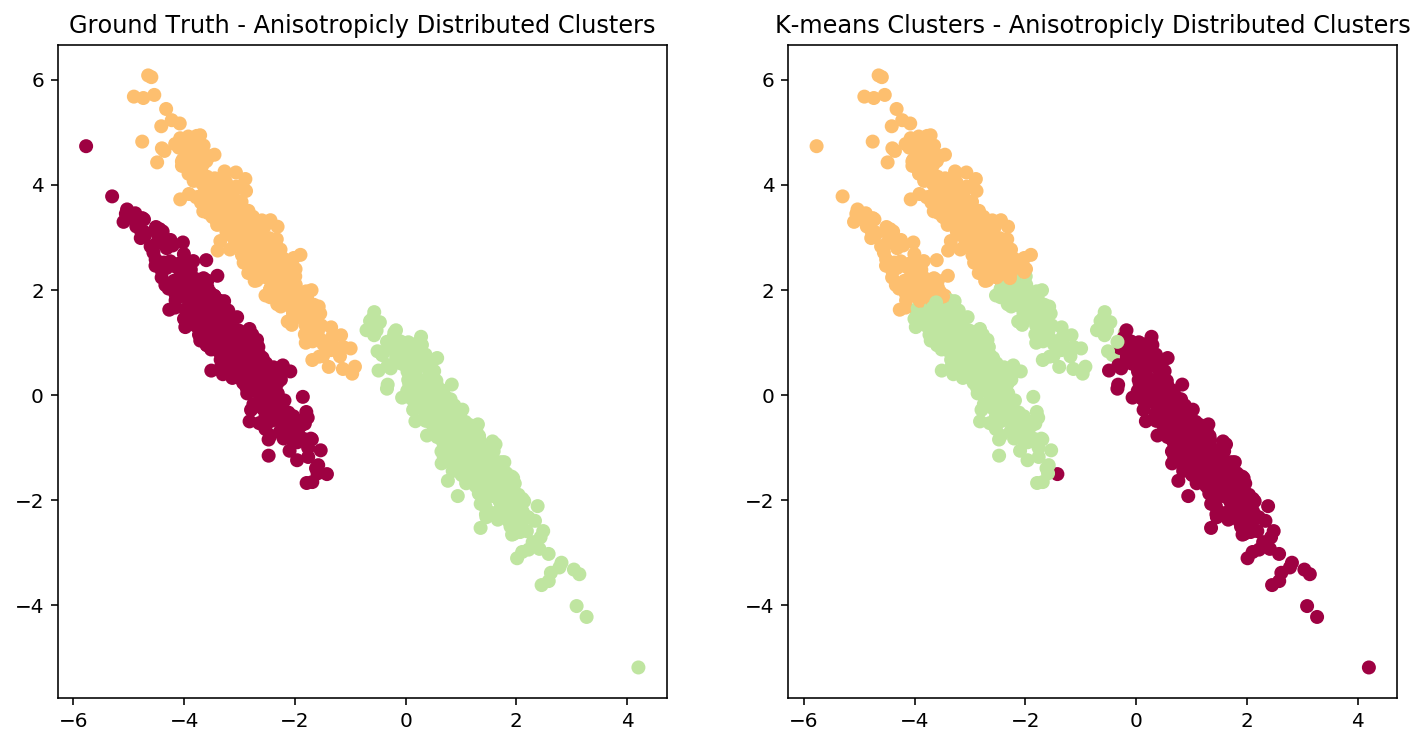

In [17]:
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters = 3, random_state = random_state).fit_predict(X_aniso)

fig2 = plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1],
            c=[cm.Spectral(float(i) /3) for i in y])
plt.title("Ground Truth - Anisotropicly Distributed Clusters")

plt.subplot(1,2,2)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1],
            c=[cm.Spectral(float(i) /3) for i in y_pred])
plt.title("K-means Clusters - Anisotropicly Distributed Clusters");


### Clusters with unequal variance

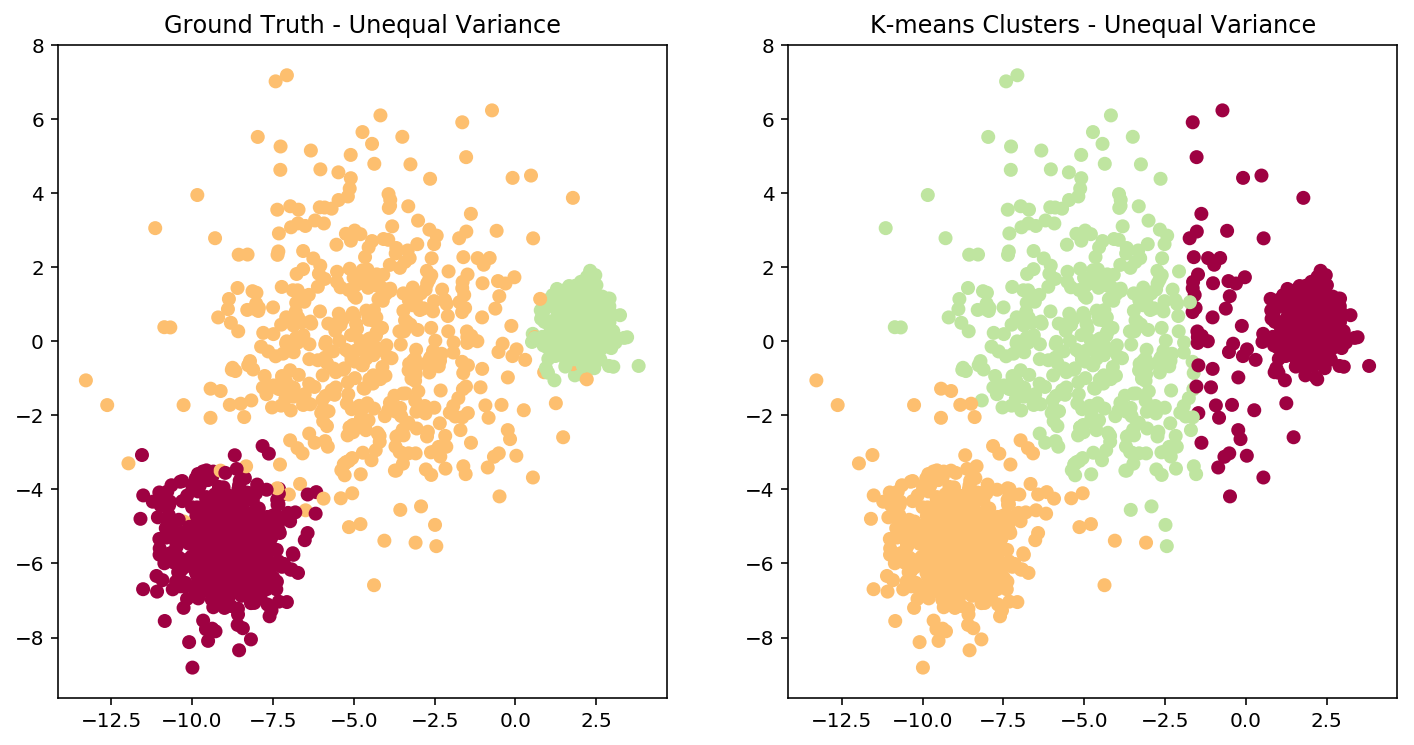

In [18]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

y_pred = KMeans(n_clusters = 3, random_state=random_state).fit_predict(X_varied)

fig3 = plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(X_varied[:, 0], X_varied[:, 1], 
            c=[cm.Spectral(float(i) / 3) for i in y_varied])
plt.title("Ground Truth - Unequal Variance")

plt.subplot(1,2,2)
plt.scatter(X_varied[:, 0], X_varied[:, 1], 
            c=[cm.Spectral(float(i) / 3) for i in y_pred])
plt.title("K-means Clusters - Unequal Variance");



###  Clusters with unequal size


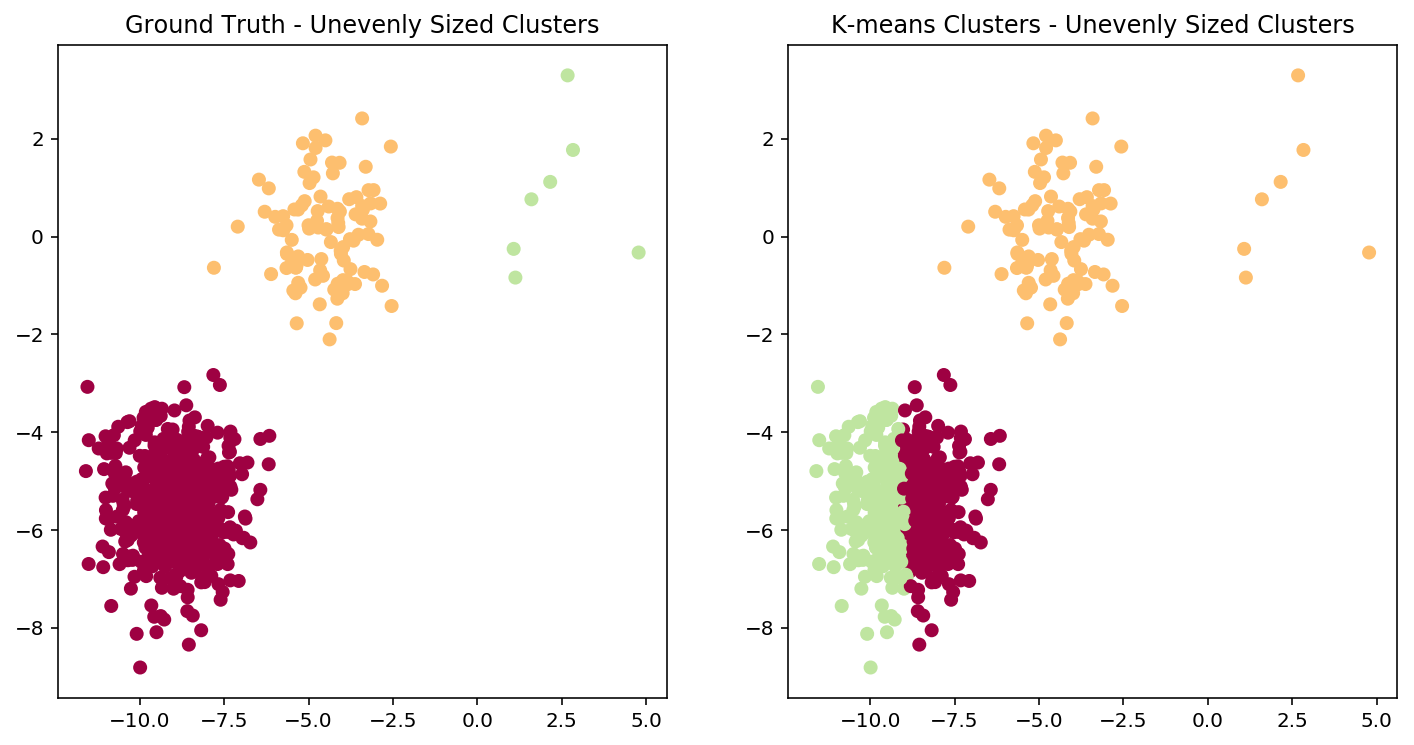

In [19]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:7]))
y_filtered = np.vstack((np.zeros((500,1)), np.ones((100,1)), 2*np.ones((7,1))))

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

fig4 = plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], \
            c=[cm.Spectral(float(i) / 3) for i in y_filtered])
plt.title("Ground Truth - Unevenly Sized Clusters")

plt.subplot(1,2,2)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], \
            c=[cm.Spectral(float(i) / 3) for i in y_pred])
plt.title("K-means Clusters - Unevenly Sized Clusters");
